___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics

#
# from collections import Counter
#
# warnings.filterwarnings("ignore")
# plt.rcParams["figure.figsize"] = (10,6)
# pd.set_option('display.max_columns', 50)
# pd.set_option('display.max_rows', 50)


In [22]:
nltk.download('punkt')       # Loads the necessary files for sentence and word tokenization.
nltk.download('stopwords')   # loads stopword datasets
nltk.download('wordnet')     # loads the necessary files for normalization.
nltk.download('omw-1.4')
# omw-1.4 is a dataset used to determine the meanings of words and expressions occurring in a text.
# It is used in the normalization processes applied to words/tokens to establish the semantic relationship between the original form of a word and its
# stemmed form, in order to reduce words to their roots.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [9]:
print('df size :', df.shape)

df size : (23486, 11)


In [10]:
sum(df.duplicated())

0

In [11]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [12]:
df["Recommended IND"].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

In [13]:
df["Recommended IND"].value_counts(normalize=True)

1    0.822362
0    0.177638
Name: Recommended IND, dtype: float64

### Data Wrangling

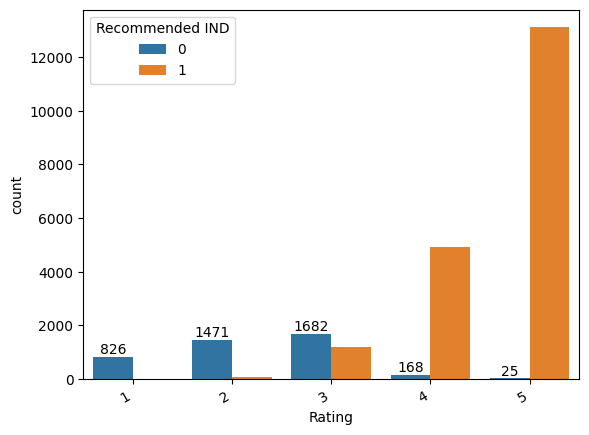

In [14]:
chart = sns.countplot(x= "Rating",hue = "Recommended IND", data=df)
chart.bar_label(chart.containers[0])
#plt.title("Number of texts per intent")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

[Text(0, 0, '4172'), Text(0, 0, '19314')]

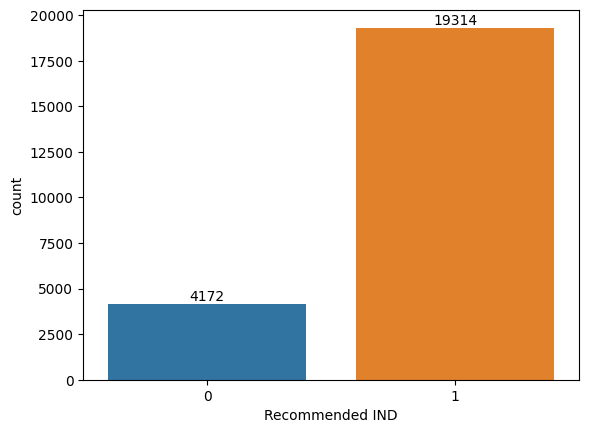

In [15]:
ax = sns.countplot(data = df, x = "Recommended IND")
ax.bar_label(ax.containers[0])

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [10]:
df = df[["Review Text", "Recommended IND"]]
df.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [11]:
df.rename(columns={"Review Text": "Review_Text", "Recommended IND": "Recommended_IND"}, inplace=True)

<ipython-input-11-2995b04e49f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"Review Text": "Review_Text", "Recommended IND": "Recommended_IND"}, inplace=True)


---
---


### Missing Value Detection

In [18]:
df.isnull().sum()

Review_Text        845
Recommended_IND      0
dtype: int64

In [19]:
df.dropna(inplace=True)

<ipython-input-19-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [20]:
df = df.reset_index(drop=True)

In [21]:
df.isnull().sum()

Review_Text        0
Recommended_IND    0
dtype: int64

In [22]:
df.Recommended_IND.value_counts(normalize=True)

1    0.818868
0    0.181132
Name: Recommended_IND, dtype: float64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22641 entries, 0 to 22640
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review_Text      22641 non-null  object
 1   Recommended_IND  22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 353.9+ KB


---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [23]:
stop_words = stopwords.words("english")
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
def cleaning_fsa(data):

    #1. removing upper brackets to keep negative auxiliary verbs in text
    text = data.replace("'",'')

    #2. Tokenize and lower
    text_tokens = word_tokenize(text.lower())

    #3. Remove punkt and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #6. joining
    return " ".join(text_cleaned)

# If you are going to perform sentiment analysis, you can use this function.

In [ ]:
df["Review_Text"] = df["Review_Text"].apply(cleaning_fsa)
df["Review_Text"].head()

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [27]:
#postive
dfp = df[df.Recommended_IND == 1]
dfp.head()

,Review_Text,Recommended_IND
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im ...,1
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1
6,aded basket hte last mintue see would look lik...,1


In [28]:
#negtive
dfn = df[df.Recommended_IND == 0]
dfn.head()

,Review_Text,Recommended_IND
2,high hope dress really wanted work initially o...,0
5,love tracy reese dress one petite foot tall us...,0
10,dress run small esp zipper area run ordered sp...,0
22,first pullover styling side zipper wouldnt pur...,0
25,loved material didnt really look long dress pu...,0


### Collect Words (positive and negative separately)

In [29]:
positive_words = " ".join(dfp.Review_Text)
positive_words[:50]

'absolutely wonderful silky sexy comfortable love d'

In [30]:
negative_words = " ".join(dfn.Review_Text)
negative_words[:50]

'high hope dress really wanted work initially order'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [31]:
from wordcloud import WordCloud

In [32]:
worldcloud = WordCloud(background_color="white", max_words =250, colormap=plt.cm.hsv)

In [33]:
wp = worldcloud.generate(positive_words)

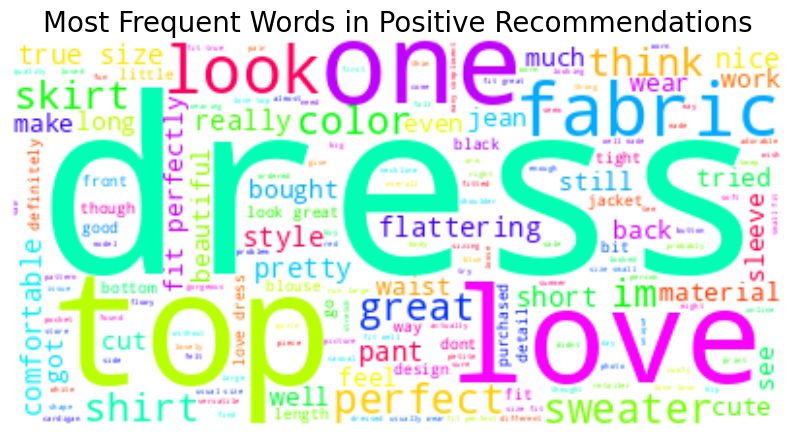

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.imshow(wp, interpolation="bilinear")
plt.title("Most Frequent Words in Positive Recommendations", fontdict={"size": 20})
plt.axis("off")
plt.show()

In [35]:
wn = worldcloud.generate(negative_words)

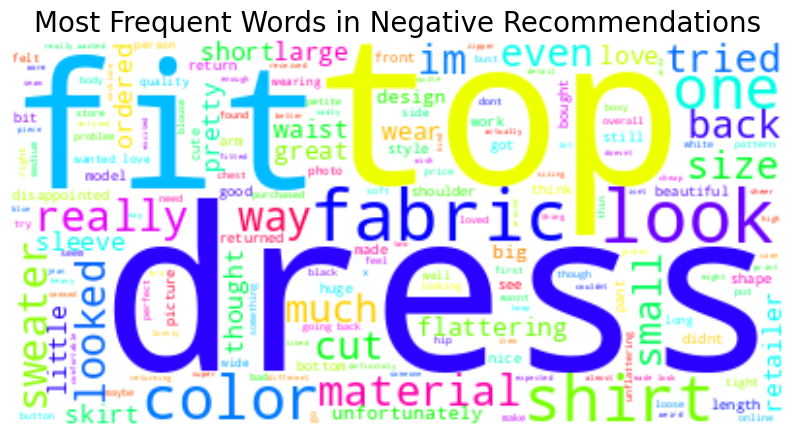

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.imshow(wn, interpolation="bilinear")
plt.title("Most Frequent Words in Negative Recommendations", fontdict={"size": 20})
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X = df["Review_Text"]
y= df["Recommended_IND"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=45)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [42]:
vectorizer.get_feature_names_out()

array(['aa', 'aaaaaaamazing', 'aaaaandidontwanttopayforshipping', ...,
       'zoolanders', 'zoom', 'zuma'], dtype=object)

In [43]:
X_train_count

<20376x11438 sparse matrix of type '<class 'numpy.int64'>'
	with 522952 stored elements in Compressed Sparse Row format>

In [44]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [45]:
df_train_count = pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out(), index=X_train.index)
df_train_count

,aa,aaaaaaamazing,aaaaandidontwanttopayforshipping,aaaaannnnnnd,aaaahmazing,aaaahs,aaahed,aame,ab,abbey,...,zipped,zipper,zippered,zippie,zipping,zombie,zone,zoolanders,zoom,zuma
12556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4429,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df_test_count = pd.DataFrame(X_test_count.toarray(), columns = vectorizer.get_feature_names_out(), index = X_test.index)
df_test_count

,aa,aaaaaaamazing,aaaaandidontwanttopayforshipping,aaaaannnnnnd,aaaahmazing,aaaahs,aaahed,aame,ab,abbey,...,zipped,zipper,zippered,zippie,zipping,zombie,zone,zoolanders,zoom,zuma
4562,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10663,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22624,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1387,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15817,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [49]:
tf_idf_vectorizer.get_feature_names_out()

array(['aa', 'aaaaaaamazing', 'aaaaandidontwanttopayforshipping', ...,
       'zoolanders', 'zoom', 'zuma'], dtype=object)

In [50]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
df_train_tfidf = pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out(),
                              index= X_train.index)
df_train_tfidf

,aa,aaaaaaamazing,aaaaandidontwanttopayforshipping,aaaaannnnnnd,aaaahmazing,aaaahs,aaahed,aame,ab,abbey,...,zipped,zipper,zippered,zippie,zipping,zombie,zone,zoolanders,zoom,zuma
12556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
df_train_tfidf.loc[2].sort_values(ascending=False)

net             0.457069
layer           0.360109
half            0.275415
outrageously    0.235429
directly        0.204291
                  ...   
flex            0.000000
flexibility     0.000000
flexible        0.000000
flexibly        0.000000
zuma            0.000000
Name: 2, Length: 11438, dtype: float64

In [53]:
# df_test_tfidf=pd.DataFrame(X_test_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names(), index = X_test.index)
# df_test_tfidf


### Eval Function

In [54]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

### CountVectorizer

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score
log = LogisticRegression(C=0.4, max_iter=1000)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.4, max_iter=1000)

In [56]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[ 242  168]
 [  75 1780]]
Test_Set
              precision    recall  f1-score   support

           0       0.76      0.59      0.67       410
           1       0.91      0.96      0.94      1855

    accuracy                           0.89      2265
   macro avg       0.84      0.77      0.80      2265
weighted avg       0.89      0.89      0.89      2265

Train_Set
              precision    recall  f1-score   support

           0       0.88      0.73      0.80      3691
           1       0.94      0.98      0.96     16685

    accuracy                           0.93     20376
   macro avg       0.91      0.86      0.88     20376
weighted avg       0.93      0.93      0.93     20376



In [57]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
model = LogisticRegression(C=0.4, max_iter=1000)
scores = cross_validate(model, X_train_count, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.913358
train_precision    0.943677
test_recall        0.952173
train_recall       0.977944
test_f1            0.932350
train_f1           0.960505
test_accuracy      0.886877
train_accuracy     0.934144
dtype: float64

In [58]:
!pip install scikit-plot

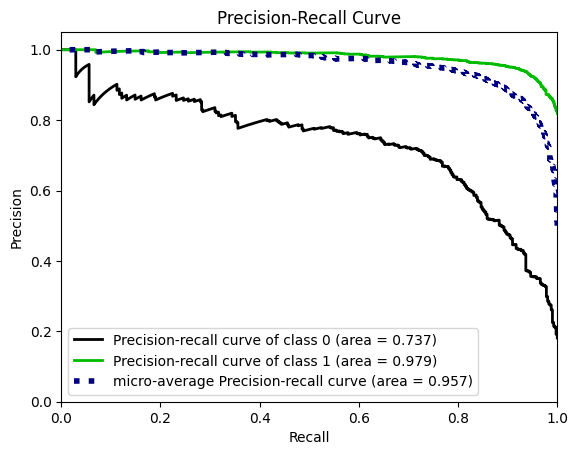

In [59]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = LogisticRegression(C=0.4, max_iter=1000)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [60]:
# from sklearn.metrics import average_precision_score
# y_test_dummies = pd.get_dummies(y_test)
# y_pred = log.predict(X_test_tf_idf)
# log_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
# log_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
# log_tfidf_AP_neg = average_precision_score(y_test_dummies["negative"], y_pred_proba[:, 0])

### TF-IDF

In [61]:
log = LogisticRegression(C=0.4, max_iter=1000, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.4, class_weight='balanced', max_iter=1000)

In [62]:
print("LOG MODEL BALANCED")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL BALANCED
[[ 349   61]
 [ 240 1615]]
Test_Set
              precision    recall  f1-score   support

           0       0.59      0.85      0.70       410
           1       0.96      0.87      0.91      1855

    accuracy                           0.87      2265
   macro avg       0.78      0.86      0.81      2265
weighted avg       0.90      0.87      0.88      2265

Train_Set
              precision    recall  f1-score   support

           0       0.61      0.91      0.73      3691
           1       0.98      0.87      0.92     16685

    accuracy                           0.88     20376
   macro avg       0.79      0.89      0.83     20376
weighted avg       0.91      0.88      0.89     20376



In [63]:
model = LogisticRegression(C=0.4, max_iter=1000)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.883153
train_precision    0.892482
test_recall        0.978783
train_recall       0.982606
test_f1            0.928505
train_f1           0.935378
test_accuracy      0.876571
train_accuracy     0.888823
dtype: float64

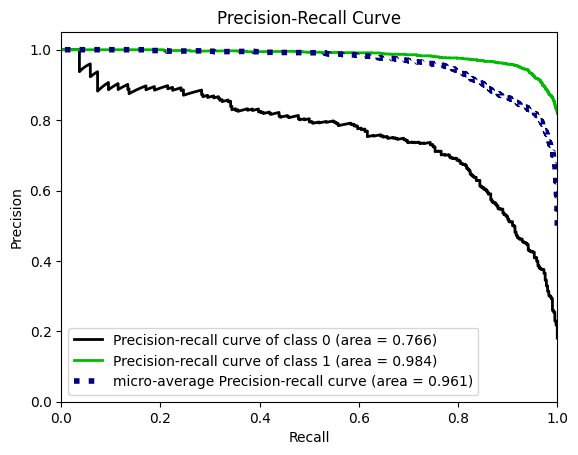

In [64]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = LogisticRegression(C=0.4, max_iter=1000)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

## Naive Bayes

### Countvectorizer

In [65]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

nb = MultinomialNB()
nb.fit(X_train_count,y_train)

MultinomialNB()

In [66]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[ 280  130]
 [ 111 1744]]
Test_Set
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       410
           1       0.93      0.94      0.94      1855

    accuracy                           0.89      2265
   macro avg       0.82      0.81      0.82      2265
weighted avg       0.89      0.89      0.89      2265

Train_Set
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      3691
           1       0.95      0.94      0.95     16685

    accuracy                           0.91     20376
   macro avg       0.85      0.86      0.85     20376
weighted avg       0.91      0.91      0.91     20376



In [67]:
model = MultinomialNB()
scores = cross_validate(model, X_train_count, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.931059
train_precision    0.949466
test_recall        0.926342
train_recall       0.943269
test_f1            0.928661
train_f1           0.946357
test_accuracy      0.883492
train_accuracy     0.912435
dtype: float64

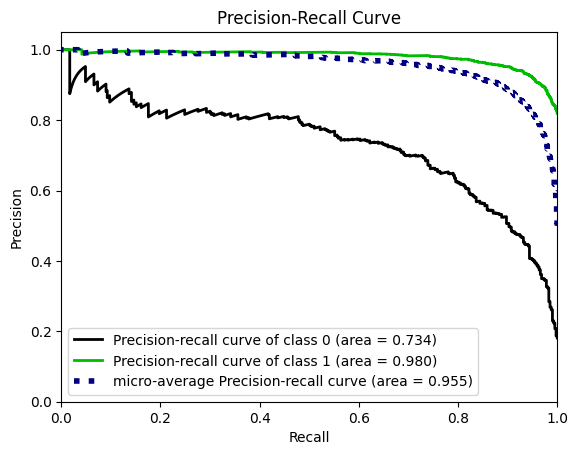

In [68]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = MultinomialNB()

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

### TF-IDF

In [69]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

nb = MultinomialNB()
nb.fit(X_train_tf_idf,y_train)

MultinomialNB()

In [70]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[  16  394]
 [   0 1855]]
Test_Set
              precision    recall  f1-score   support

           0       1.00      0.04      0.08       410
           1       0.82      1.00      0.90      1855

    accuracy                           0.83      2265
   macro avg       0.91      0.52      0.49      2265
weighted avg       0.86      0.83      0.75      2265

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.11      0.20      3691
           1       0.84      1.00      0.91     16685

    accuracy                           0.84     20376
   macro avg       0.90      0.55      0.55     20376
weighted avg       0.86      0.84      0.78     20376



In [71]:
model = MultinomialNB()
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.826772
train_precision    0.832837
test_recall        0.998861
train_recall       0.999554
test_f1            0.904705
train_f1           0.908611
test_accuracy      0.827689
train_accuracy     0.835351
dtype: float64

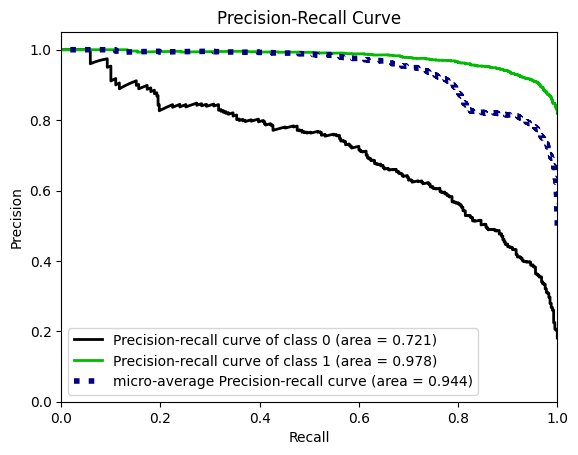

In [72]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = MultinomialNB()

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

## Support Vector Machine (SVM)

### Countvectorizer

In [75]:
from sklearn.svm import SVC
svc_count = SVC(probability = True)
svc_count.fit(X_train_count,y_train)

SVC(probability=True)

In [76]:
print("SVC MODEL")
eval(svc_count, X_train_count, X_test_count)

SVC MODEL
[[ 207  203]
 [  48 1807]]
Test_Set
              precision    recall  f1-score   support

           0       0.81      0.50      0.62       410
           1       0.90      0.97      0.94      1855

    accuracy                           0.89      2265
   macro avg       0.86      0.74      0.78      2265
weighted avg       0.88      0.89      0.88      2265

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      3691
           1       0.97      0.99      0.98     16685

    accuracy                           0.97     20376
   macro avg       0.96      0.92      0.94     20376
weighted avg       0.96      0.97      0.96     20376



In [ ]:
model = SVC(probability = True)
scores = cross_validate(model, X_train_count, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall


model = SVC(probability = True)

model.fit(X_train_count, y_train)

decision_function = model.decision_function(X_test_count)

plot_precision_recall(y_test, decision_function)
plt.show();

### TD-IDF

In [ ]:
from sklearn.svm import SVC
svc_TD_IDF = SVC(probability = True)
svc_TD_IDF.fit(X_train_tf_idf,y_train)

In [ ]:
print("SVC MODEL")
eval(svc_TD_IDF, X_train_tf_idf, X_test_tf_idf)

In [ ]:
model = SVC(probability = True)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall


model = SVC(probability = True)

model.fit(X_train_tf_idf, y_train)

decision_function = model.decision_function(X_test_tf_idf)

plot_precision_recall(y_test, decision_function)
plt.show();

## Random Forest

### Countvectorizer

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1) # class_weight="balanced"
rf.fit(X_train_count, y_train)

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=42)

In [74]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[  28  382]
 [   1 1854]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.07      0.13       410
           1       0.83      1.00      0.91      1855

    accuracy                           0.83      2265
   macro avg       0.90      0.53      0.52      2265
weighted avg       0.85      0.83      0.77      2265

Train_Set
              precision    recall  f1-score   support

           0       1.00      0.46      0.63      3691
           1       0.89      1.00      0.94     16685

    accuracy                           0.90     20376
   macro avg       0.95      0.73      0.78     20376
weighted avg       0.91      0.90      0.89     20376



In [75]:
model = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train_count, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.827620
train_precision    0.894887
test_recall        0.999041
train_recall       1.000000
test_f1            0.905286
train_f1           0.944527
test_accuracy      0.828818
train_accuracy     0.903814
dtype: float64

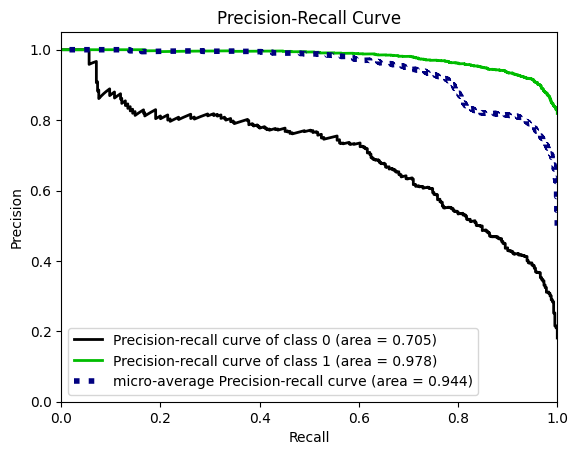

In [76]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

### TF-IDF

In [77]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1) # class_weight="balanced"
rf.fit(X_train_count, y_train)

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=42)

In [78]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[   0  410]
 [   0 1855]]
Test_Set
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       410
           1       0.82      1.00      0.90      1855

    accuracy                           0.82      2265
   macro avg       0.41      0.50      0.45      2265
weighted avg       0.67      0.82      0.74      2265

Train_Set
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3691
           1       0.82      1.00      0.90     16685

    accuracy                           0.82     20376
   macro avg       0.41      0.50      0.45     20376
weighted avg       0.67      0.82      0.74     20376



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [79]:
model = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.827847
train_precision    0.890962
test_recall        0.998921
train_recall       1.000000
test_f1            0.905373
train_f1           0.942337
test_accuracy      0.829014
train_accuracy     0.899784
dtype: float64

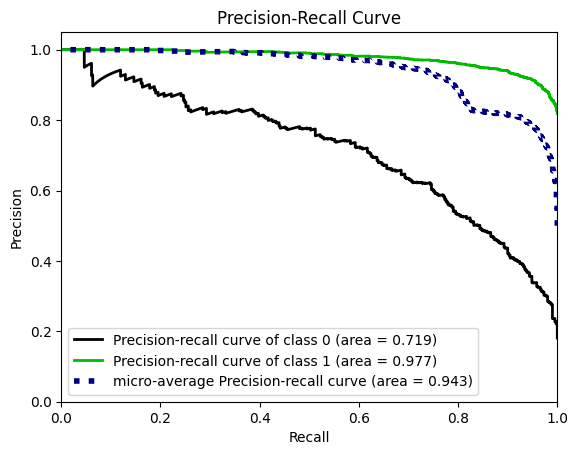

In [80]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

## Ada Boosting

### Countvectorizer

In [81]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [82]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[ 238  172]
 [  91 1764]]
Test_Set
              precision    recall  f1-score   support

           0       0.72      0.58      0.64       410
           1       0.91      0.95      0.93      1855

    accuracy                           0.88      2265
   macro avg       0.82      0.77      0.79      2265
weighted avg       0.88      0.88      0.88      2265

Train_Set
              precision    recall  f1-score   support

           0       0.79      0.65      0.71      3691
           1       0.93      0.96      0.94     16685

    accuracy                           0.91     20376
   macro avg       0.86      0.81      0.83     20376
weighted avg       0.90      0.91      0.90     20376



In [ ]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train_count, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = AdaBoostClassifier(n_estimators= 500, random_state = 42)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

### TF-IDF

In [84]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [85]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[ 234  176]
 [ 108 1747]]
Test_Set
              precision    recall  f1-score   support

           0       0.68      0.57      0.62       410
           1       0.91      0.94      0.92      1855

    accuracy                           0.87      2265
   macro avg       0.80      0.76      0.77      2265
weighted avg       0.87      0.87      0.87      2265

Train_Set
              precision    recall  f1-score   support

           0       0.81      0.71      0.76      3691
           1       0.94      0.96      0.95     16685

    accuracy                           0.92     20376
   macro avg       0.87      0.84      0.85     20376
weighted avg       0.91      0.92      0.92     20376



In [ ]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = AdaBoostClassifier(n_estimators= 500, random_state = 42)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

## DL modeling

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
X = df["Review_Text"]
y = df["Recommended_IND"]

### Tokenization

In [26]:
tokenizer = Tokenizer() # as we have small data we didn't use num_words parameter

In [ ]:
tokenizer.fit_on_texts(X)

### Creating word index

In [28]:
tokenizer.word_index

{}

In [93]:
len(tokenizer.word_index)

11996

### Converting tokens to numeric

In [ ]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [95]:
X[:2]

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
Name: Review_Text, dtype: object

In [96]:
X_num_tokens[:2]

[[173, 406, 733, 513, 24],
 [4,
  1,
  1391,
  49,
  1063,
  150,
  57,
  11,
  220,
  992,
  318,
  12,
  16,
  77,
  992,
  40,
  27,
  40,
  4,
  35,
  162,
  17,
  207,
  12,
  92,
  75,
  1131,
  325,
  599,
  40]]

### Maximum number of tokens for all documents¶

In [97]:
len(X_num_tokens[105])

30

In [98]:
len(X_num_tokens[106])

6

In [99]:
len(X_num_tokens[5999])

45

In [100]:
num_tokens = [len(sen_tokens) for sen_tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [101]:
num_tokens

array([ 5, 30, 47, ..., 19, 38, 11])

In [102]:
num_tokens.mean()

28.323174771432356

In [103]:
num_tokens.max()

58

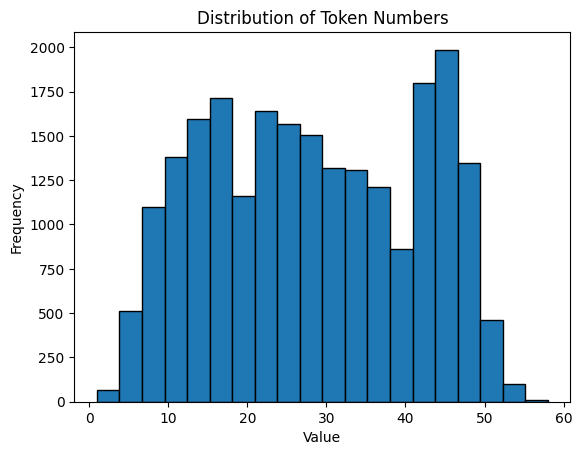

In [104]:
# Plot a histogram to visualize the distribution
plt.hist(num_tokens, bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.title("Distribution of Token Numbers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [105]:
max_tokens = 103

In [106]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

In [107]:
sum(num_tokens <= max_tokens)

22641

### Fixing token counts of all documents (pad_sequences)

In [108]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [109]:
X_pad.shape

(22641, 103)

In [110]:
len(np.array(X_num_tokens[800]))

8

In [111]:
np.argmax(num_tokens)

11957

In [112]:
np.array(X_num_tokens[16263])

array([   4,  596,    5,    4,   30,   54,  315,  132,  334,    5,  265,
        388,  368,   57,  113,   19,   11,   58,   32,    5,  320,   32,
        113,   55,   73,  593,   63,  603,   59,    5,   95,    6, 1305,
          5, 3655, 1455,    3,   32, 1110,    5,   15,   25,  375,   29,
        512,  449,   67,    3,  182,   58])

In [113]:
X_pad[16263]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    4,  596,
          5,    4,   30,   54,  315,  132,  334,    5,  265,  388,  368,
         57,  113,   19,   11,   58,   32,    5,  320,   32,  113,   55,
         73,  593,   63,  603,   59,    5,   95,    6, 1305,    5, 3655,
       1455,    3,   32, 1110,    5,   15,   25,  375,   29,  512,  449,
         67,    3,  182,   58], dtype=int32)

### Train Set Split

In [114]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=42)

### Modeling

In [117]:
model = Sequential()

In [118]:
embedding_size = 50

In [121]:
# model.add(Embedding(input_dim=len(tokenizer.word_index)+1,
#                     output_dim=embedding_size,
#                     input_length=max_tokens))

# # The Embedding layer is a layer used in NLP models and consists of a 3-dimensional tensor.
# # The first dimension is the total number of tokens in the training set.
# # The second dimension is how many tokens each document consists of (max_tokens).
# # The third dimension is how many elements a word embedding for each token consists of (embedding_size).

# # When converting documents to a numeric version, since the first 10,000 tokens most frequently used in the corpus are used, we make the
# # input_dim=num_words adjustment to the Embedding layer so that only the first 10,000 tokens most frequently used in the corpus are used in both training and
# # prediction stages.

# # If you make the input_dim smaller than 10,000 (like 5,000), then the model trains and predicts using only the first 5,000 tokens most frequently
# # used in the corpus.

# model.add(Dropout(0.2))

# model.add(GRU(units=50, return_sequences=True))

# # return_sequences=False makes the model transfer only the last time step's (t_n) hidden_state to the next layer. The default is False.

# # return_sequences=True makes the model transfer all hidden_states from all time steps (like t_0, t_1, t_2 .....t_n) to the next LSTM, GRU layers.
# # This way, the model tries to keep the entire sentence in mind. If an LSTM/GRU layer is followed by another LSTM/GRU layer, return_sequences should be set
# # to True, otherwise the model will return an error. However, if the next layer is a dense layer, return_sequences should be set to False, otherwise
# # the model will again return an error. This is because Dense layers only work with a single hidden_state.

# model.add(GRU(units=25, return_sequences=True))
# model.add(Dropout(0.2))
# # We set return_sequences=True because the next layer is a GRU layer.

# model.add(GRU(units=12, return_sequences=False))
# # We set return_sequences=False because the next layer is a Dense layer.


# model.add(Dense(7, activation='softmax'))  # There are 7 classes

In [132]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1,
                    output_dim=embedding_size,
                    input_length=max_tokens))

model.add(Dropout(0.5))

model.add(GRU(units=48, return_sequences=True))
# model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(GRU(units=24, return_sequences=True))
model.add(Dropout(0.5))

model.add(GRU(units=12))
# model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [133]:
optimizer = Adam(learning_rate=0.001)

In [134]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

# The compile is where we adjust the optimization parameters. Compile parameters include the choice of gradient descent algorithm to be used in
# the optimization processes of the DL model, the determination of the loss function, and the metrics to be followed during optimization processes.
# The details are as follows.

# loss: The loss function to be used for optimizing the model. For example, for classification: binary_crossentropy or categorical_crossentropy,
# for regression: mse, etc.
# optimizer: The optimization algorithm to be used to optimize the model's weights. For example, SGD, Adam, or RMSprop, etc.
# metrics: The metrics to be used to evaluate the model's performance. For example, accuracy, precision, or recall, etc.

In [135]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 103, 50)           599850    
                                                                 
 dropout_2 (Dropout)         (None, 103, 50)           0         
                                                                 
 gru_3 (GRU)                 (None, 103, 48)           14400     
                                                                 
 dropout_3 (Dropout)         (None, 103, 48)           0         
                                                                 
 gru_4 (GRU)                 (None, 103, 24)           5328      
                                                                 
 dropout_4 (Dropout)         (None, 103, 24)           0         
                                                                 
 gru_5 (GRU)                 (None, 12)               

In [136]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max", verbose=1,
                           patience = 2, restore_best_weights=True)

In [137]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.61060833, 2.76022758])

In [138]:
# model.fit(X_train, y_train, epochs=20, batch_size=32,       #sample_weight= classes_weights
#          validation_data=(X_test, y_test), callbacks=[early_stop])
model.fit(X_train, y_train, epochs=10, batch_size=32, sample_weight= classes_weights,  # batch size ın küçük olması çoğunlukla eğitimin daha iyi olmasını sağlar. Bu nedenle overfittingi gidermek için büyük batch size lar kullanabilirsiniz.
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


637/637 [==============================] - 125s 183ms/step - loss: 0.0000e+00 - recall: 0.0014 - val_loss: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
637/637 [==============================] - 159s 250ms/step - loss: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
637/637 [==============================] - 166s 260ms/step - loss: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3: early stopping


In [139]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.0,0.001438,0.0,0.0
1,0.0,0.000000,0.0,0.0
2,0.0,0.000000,0.0,0.0


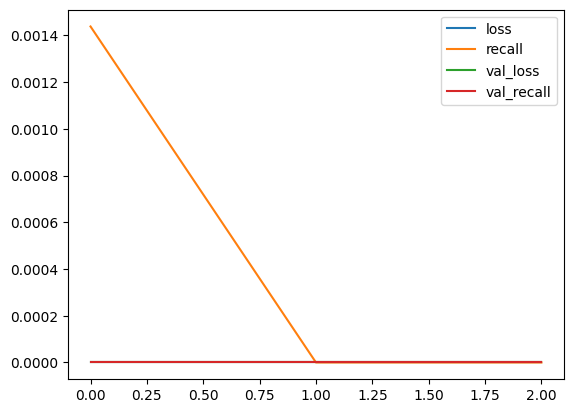

In [140]:
model_loss.plot();

### Model Evaluation

In [141]:
model.evaluate(X_test, y_test)

71/71 [==============================] - 2s 29ms/step - loss: 0.0000e+00 - recall: 0.0000e+00


[0.0, 0.0]

In [142]:
model.evaluate(X_train, y_train)

637/637 [==============================] - 23s 37ms/step - loss: 0.0000e+00 - recall: 0.0000e+00


[0.0, 0.0]

In [143]:
y_pred = model.predict(X_test)

71/71 [==============================] - 3s 29ms/step


In [144]:
y_pred

array([[1.3693731e-05],
       [1.3693731e-05],
       [1.3693731e-05],
       ...,
       [1.3693731e-05],
       [1.3693731e-05],
       [1.3693730e-05]], dtype=float32)

In [145]:
model.save('/content/drive/MyDrive/intent_classifier_deep_learning.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## BERT Modeling

In [36]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

# With this code, 8 TPU cores are allocated.

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [37]:
strategy = tf.distribute.TPUStrategy(resolver)

In [38]:
!pip install transformers
#To use BERT models, we first need to install transformers as BERT models are built on top of transformers.

### Read Data

In [39]:
df.head()

,Review_Text,Recommended_IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [40]:
X = df['Review_Text'].values
y = df['Recommended_IND'].values

### Train test split

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

### Tokenization

In [42]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

### Fixing token counts of all documents

In [ ]:
# For every sentence...
max_token = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(sent, add_special_tokens=True) # we use tokenizer2 for uncased
    max_token.append(len(input_ids))

print('Max sentence length: ', max(max_token))

# We will use the 'tokenizer.encode()' function to find out how many tokens the longest comment consists of and to decide on the number
# of tokens to fix for all documents/texts.

### Transformation Vectors to Matrices

In [44]:
def transformation(X):
  # set array dimensions
  seq_len = 163  # max +1
  num_samples = len(X)

  # initialize empty zero arrays
  Xids = np.zeros((num_samples, seq_len))
  Xmask = np.zeros((num_samples, seq_len))


  for i, phrase in enumerate(X):
      tokens = tokenizer.encode_plus(phrase, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True)

      # assign tokenized outputs to respective rows in numpy arrays
      Xids[i] = tokens['input_ids']
      Xmask[i] = tokens['attention_mask']
  return Xids, Xmask

In [ ]:
Xids_train, Xmask_train = transformation(X_train)

Xids_test, Xmask_test = transformation(X_test)

In [ ]:
labels_train = y_train.reshape(-1,1)
labels_train

In [ ]:
labels_test = y_test.reshape(-1,1)
labels_test

### Transformation Matrix to Tensorflow tensor

In [ ]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, labels_train))
dataset_train

In [ ]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, labels_test))
dataset_test

In [ ]:
def map_func(Xids, Xmask, labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Xids, 'attention_mask': Xmask}, labels

In [ ]:
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

### Batch Size

In [ ]:
batch_size = 32 # 16, 32

# batch_size
# fit into a batch of 32
train_ds = dataset_train.batch(batch_size) # train_ds will be used for model testing
val_ds = dataset_test.batch(batch_size)

length = len(X_train)
train_ds2 = dataset_train.shuffle(buffer_size = length, reshuffle_each_iteration=True).batch(batch_size) # train_d

### Creating optimization

In [ ]:
def create_model():
    seq_len =163
    from transformers import TFAutoModel
    model = TFAutoModel.from_pretrained("bert-base-uncased") # token işlemleri uncased üzerine yapıldığı için model de uncased üzerine kurulmalıdır.
    input_ids = tf.keras.layers.Input(shape=(seq_len,), name='input_ids', dtype='int32') # Bert modelleri datayı int32 olarak ister. Bu nedenle dtype="int32" mutlaka belirtilmelidir.
    attention_mask = tf.keras.layers.Input(shape=(seq_len,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1] # input_id ve attention_mask vererek BERT modellerinin eğitildiğii sırada oluşturduğu word embeddingleri kendi inputumuz için çekiyoruz. Pooler output BERT modelinin word embedding değerlerinin tutulduğu katman. Aynı zamanda 1. katman olduğu için [1] olarak da kullanılabilir.

    x = tf.keras.layers.Dense(seq_len, activation='relu')(embeddings) # sonuna embeddings yazdığımızda embedding bilgilerini buraya aktarır. Cümle içerisindeki bütün tokenlerin birbiri ile kullanımını son bir kes görmek için bu dense layer kullanılıyor.
    x = tf.keras.layers.Dropout(0.1, name="dropout")(x) #0.1
    y = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(x)

    return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)

### Creating Model with TPU

In [ ]:
with strategy.scope():  # TPU synchronization

  optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5) #3e-5, 5e-5 # BERT modellerinde tavsiye edilen learning rate değerleri
  loss = tf.keras.losses.BinaryCrossentropy()
  recall = tf.keras.metrics.Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

In [ ]:
model3.summary()

### Model Fiting

In [ ]:
history = model3.fit(
    train_ds2, validation_data= val_ds, class_weight= {0:1, 1:4},
    epochs=1) #epoch= 2 or 3

### Model evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5


print(classification_report(y_test, y_pred))

In [ ]:
y_train_pred = model3.predict(train_ds) >= 0.5


print(classification_report(y_train, y_train_pred))

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = model3.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred_proba = model4.predict(val_ds)
y_pred = (y_pred_proba > 0.5).astype("int")
BERT_rec = recall_score(y_test, y_pred)
BERT_f1 = f1_score(y_test, y_pred)
BERT_AP = average_precision_score(y_test, y_pred_proba)

In [ ]:
BERT_AP

### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [ ]:
compare = pd.DataFrame({"Model": ["LogReg_count", "LogReg_tfidf", "NaiveBayes_count", "NaiveBayes_tfidf", "SVM_count", "SVM_tfidf", "Random Forest_count",
                                  "Random Forest_tfidf", "AdaBoost_count", "AdaBoost_tfidf", "DL_model", "BERT_model"],

                        "F1_Score_Negative": [log_count_f1_neg, log_tfidf_f1_neg, nb_count_f1_neg, nb_tfidf_f1_neg, svc_count_f1_neg, svc_tfidf_f1_neg,
                                             rf_count_f1_neg, rf_tfidf_f1_neg, ada_count_f1_neg, ada_tfidf_f1_neg, DL_f1_neg, BERT_f1],

                        "Recall_Score_Negative": [log_count_rec_neg, log_tfidf_rec_neg, nb_count_rec_neg, nb_tfidf_rec_neg, svc_count_rec_neg,
                                                  svc_tfidf_rec_neg, rf_count_rec_neg, rf_tfidf_rec_neg, ada_count_rec_neg, ada_tfidf_rec_neg,
                                                  DL_rec_neg, BERT_rec],

                        "Average_Precision_Score": [log_count_AP, log_tfidf_AP, nb_count_AP, nb_tfidf_AP, svc_count_AP, svc_tfidf_AP, rf_count_AP,
                                                          rf_tfidf_AP, ada_count_AP, ada_tfidf_AP, DL_AP, BERT_AP]})


# plot model comparision metrics for each model

plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Recall_Score_Negative", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score_Negative", ascending=False)
ax=sns.barplot(x="F1_Score_Negative", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___